In [ ]:
import pandas as pd

In [ ]:
weather = pd.read_csv("/content/3648670.csv", index_col="DATE")

In [ ]:
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1958-03-05,SA000040438,"RIYADH OBS. O.A.P., SA",NaN,77.0,NaN,NaN
1958-03-06,SA000040438,"RIYADH OBS. O.A.P., SA",NaN,76.0,NaN,NaN
1958-03-07,SA000040438,"RIYADH OBS. O.A.P., SA",NaN,80.0,NaN,NaN
1958-03-08,SA000040438,"RIYADH OBS. O.A.P., SA",NaN,80.0,NaN,NaN
1958-03-09,SA000040438,"RIYADH OBS. O.A.P., SA",NaN,73.0,NaN,NaN
...,...,...,...,...,...,...
2022-02-24,SA000040438,"RIYADH OBS. O.A.P., SA",NaN,73.0,NaN,NaN
2022-02-25,SA000040438,"RIYADH OBS. O.A.P., SA",NaN,72.0,NaN,NaN
2022-02-26,SA000040438,"RIYADH OBS. O.A.P., SA",NaN,80.0,NaN,NaN


In [ ]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [ ]:
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.652426
TAVG       0.000236
TMAX       0.285824
TMIN       0.289133
dtype: float64

In [ ]:
valid_columns = weather.columns[null_pct < 0.5]

In [ ]:
valid_columns

Index(['STATION', 'NAME', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [ ]:
weather =weather[valid_columns].copy()

In [ ]:
weather.columns = weather.columns.str.lower()

In [ ]:
weather

,station,name,tavg,tmax,tmin
DATE,,,,,
1958-03-05,SA000040438,"RIYADH OBS. O.A.P., SA",77.0,NaN,NaN
1958-03-06,SA000040438,"RIYADH OBS. O.A.P., SA",76.0,NaN,NaN
1958-03-07,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,NaN,NaN
1958-03-08,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,NaN,NaN
1958-03-09,SA000040438,"RIYADH OBS. O.A.P., SA",73.0,NaN,NaN
...,...,...,...,...,...
2022-02-24,SA000040438,"RIYADH OBS. O.A.P., SA",73.0,NaN,NaN
2022-02-25,SA000040438,"RIYADH OBS. O.A.P., SA",72.0,NaN,NaN
2022-02-26,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,NaN,NaN


In [ ]:
weather = weather.ffill()

In [ ]:

weather.apply(pd.isnull).sum()

station       0
name          0
tavg          0
tmax       1866
tmin       1867
dtype: int64

In [ ]:
weather.apply(lambda x: (x == 9999).sum())


station    0
name       0
tavg       0
tmax       0
tmin       0
dtype: int64

In [ ]:
weather.dtypes


station     object
name        object
tavg       float64
tmax       float64
tmin       float64
dtype: object

In [ ]:
weather.index


Index(['1958-03-05', '1958-03-06', '1958-03-07', '1958-03-08', '1958-03-09',
       '1958-03-10', '1958-03-11', '1958-03-12', '1958-03-13', '1958-03-14',
       ...
       '2022-02-06', '2022-02-07', '2022-02-21', '2022-02-22', '2022-02-23',
       '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28'],
      dtype='object', name='DATE', length=16923)

In [ ]:
weather.index = pd.to_datetime(weather.index)


In [ ]:
weather.index.year.value_counts().sort_index()


1958    293
1959    365
1960    359
1961    336
1962     90
1963     13
1964      5
1966     46
1967    134
1968    225
1973    314
1974    301
1975    142
1976    301
1977    362
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    365
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    364
2000    366
2001    365
2002    365
2003    364
2004    366
2005    365
2006    365
2007    364
2008    366
2009    364
2010    365
2011    222
2014    218
2015    267
2016    104
2017     27
2018     45
2019    109
2020    329
2021    244
2022     24
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

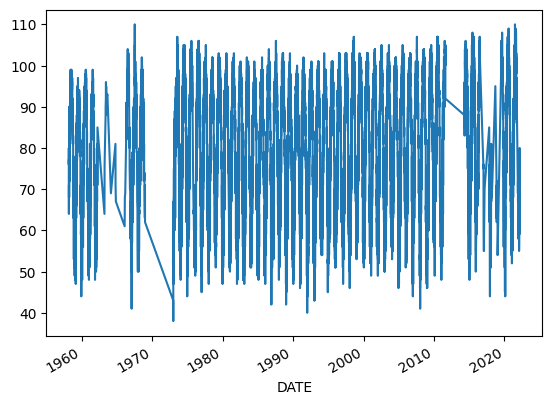

In [ ]:
weather["tavg"].plot()

In [ ]:
weather

,station,name,tavg,tmax,tmin
DATE,,,,,
1958-03-05,SA000040438,"RIYADH OBS. O.A.P., SA",77.0,NaN,NaN
1958-03-06,SA000040438,"RIYADH OBS. O.A.P., SA",76.0,NaN,NaN
1958-03-07,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,NaN,NaN
1958-03-08,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,NaN,NaN
1958-03-09,SA000040438,"RIYADH OBS. O.A.P., SA",73.0,NaN,NaN
...,...,...,...,...,...
2022-02-24,SA000040438,"RIYADH OBS. O.A.P., SA",73.0,117.0,69.0
2022-02-25,SA000040438,"RIYADH OBS. O.A.P., SA",72.0,117.0,69.0
2022-02-26,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,117.0,69.0


In [ ]:
weaather = weather.ffill()

In [ ]:
weather['target'] = weather.shift(-1)['tmax']

In [ ]:
weather

,station,name,tavg,tmax,tmin,target
DATE,,,,,,
1958-03-05,SA000040438,"RIYADH OBS. O.A.P., SA",77.0,NaN,NaN,NaN
1958-03-06,SA000040438,"RIYADH OBS. O.A.P., SA",76.0,NaN,NaN,NaN
1958-03-07,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,NaN,NaN,NaN
1958-03-08,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,NaN,NaN,NaN
1958-03-09,SA000040438,"RIYADH OBS. O.A.P., SA",73.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-02-24,SA000040438,"RIYADH OBS. O.A.P., SA",73.0,117.0,69.0,117.0
2022-02-25,SA000040438,"RIYADH OBS. O.A.P., SA",72.0,117.0,69.0,117.0
2022-02-26,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,117.0,69.0,117.0


In [ ]:
weather = weather.ffill()

In [ ]:
weather

,station,name,tavg,tmax,tmin,target
DATE,,,,,,
1958-03-05,SA000040438,"RIYADH OBS. O.A.P., SA",77.0,NaN,NaN,NaN
1958-03-06,SA000040438,"RIYADH OBS. O.A.P., SA",76.0,NaN,NaN,NaN
1958-03-07,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,NaN,NaN,NaN
1958-03-08,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,NaN,NaN,NaN
1958-03-09,SA000040438,"RIYADH OBS. O.A.P., SA",73.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-02-24,SA000040438,"RIYADH OBS. O.A.P., SA",73.0,117.0,69.0,117.0
2022-02-25,SA000040438,"RIYADH OBS. O.A.P., SA",72.0,117.0,69.0,117.0
2022-02-26,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,117.0,69.0,117.0


In [ ]:
weather['tmax'] = weather['tmax'].fillna(0)

In [ ]:
weather['tmin'] = weather['tmin'].fillna(0)

In [ ]:
weather['target'] = weather['target'].fillna(0)

In [ ]:
weather

,station,name,tavg,tmax,tmin,target
DATE,,,,,,
1958-03-05,SA000040438,"RIYADH OBS. O.A.P., SA",77.0,0.0,0.0,0.0
1958-03-06,SA000040438,"RIYADH OBS. O.A.P., SA",76.0,0.0,0.0,0.0
1958-03-07,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,0.0,0.0,0.0
1958-03-08,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,0.0,0.0,0.0
1958-03-09,SA000040438,"RIYADH OBS. O.A.P., SA",73.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2022-02-24,SA000040438,"RIYADH OBS. O.A.P., SA",73.0,117.0,69.0,117.0
2022-02-25,SA000040438,"RIYADH OBS. O.A.P., SA",72.0,117.0,69.0,117.0
2022-02-26,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,117.0,69.0,117.0


In [ ]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=.1)

In [ ]:
weather.corr()

<ipython-input-50-7abb8bc3d4be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather.corr()


,tavg,tmax,tmin,target
tavg,1.000000,0.439394,0.485665,0.430307
tmax,0.439394,1.000000,0.966121,0.992492
tmin,0.485665,0.966121,1.000000,0.960644
target,0.430307,0.992492,0.960644,1.000000


In [ ]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]


In [ ]:
predictors

Index(['tavg', 'tmax', 'tmin', 'rolling_3_tmax', 'rolling_3_tmax_pct',
       'rolling_3_tmin', 'rolling_3_tmin_pct', 'rolling_3_tavg',
       'rolling_3_tavg_pct', 'rolling_14_tmax', 'rolling_14_tmax_pct',
       'rolling_14_tmin', 'rolling_14_tmin_pct', 'rolling_14_tavg',
       'rolling_14_tavg_pct', 'month_avg_tmax', 'day_avg_tmax',
       'month_avg_tmin', 'day_avg_tmin', 'month_avg_tavg', 'day_avg_tavg'],
      dtype='object')

In [ ]:

def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [ ]:
prediction = backtest(weather, rr, predictors)

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(prediction["actual"], prediction["prediction"])

2.8616022206283955

In [ ]:
prediction.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
1997-10-18,62.0,97.970856,35.970856
1997-10-19,94.0,64.979775,29.020225
2009-01-01,56.0,83.398914,27.398914
2000-01-17,55.0,81.192586,26.192586
2010-02-04,63.0,89.007590,26.007590
...,...,...,...
2007-06-12,106.0,105.999897,0.000103
1983-09-29,99.0,98.999924,0.000076
1994-06-09,108.0,108.000072,0.000072


In [ ]:
pd.Series(rr.coef_, index=predictors)

tavg   -0.021752
tmax    0.961726
tmin    0.049085
dtype: float64

In [ ]:

def pct_diff(old, new):
    return (new - old) / old

In [ ]:
def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

In [ ]:
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "tavg"]:
        weather = compute_rolling(weather, horizon, col)

In [ ]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "tavg"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [ ]:
weather

,station,name,tavg,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_tavg,rolling_14_tavg_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_tavg,day_avg_tavg
DATE,,,,,,,,,,,,,,,,,,,,,
1958-04-16,SA000040438,"RIYADH OBS. O.A.P., SA",84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,82.071429,0.023499,0.000000,0.000000,0.000000,0.000000,84.000000,84.000000
1958-04-17,SA000040438,"RIYADH OBS. O.A.P., SA",84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,82.285714,0.020833,0.000000,0.000000,0.000000,0.000000,84.000000,84.000000
1958-04-18,SA000040438,"RIYADH OBS. O.A.P., SA",90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,82.928571,0.085271,0.000000,0.000000,0.000000,0.000000,86.000000,90.000000
1958-04-19,SA000040438,"RIYADH OBS. O.A.P., SA",87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,83.285714,0.044597,0.000000,0.000000,0.000000,0.000000,86.250000,87.000000
1958-04-20,SA000040438,"RIYADH OBS. O.A.P., SA",90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,84.142857,0.069610,0.000000,0.000000,0.000000,0.000000,87.000000,90.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,SA000040438,"RIYADH OBS. O.A.P., SA",73.0,117.0,69.0,117.0,117.0,0.0,69.0,0.0,...,69.0,0.0,63.285714,0.153499,69.610248,74.066667,47.447205,50.400000,63.182453,66.044444
2022-02-25,SA000040438,"RIYADH OBS. O.A.P., SA",72.0,117.0,69.0,117.0,117.0,0.0,69.0,0.0,...,69.0,0.0,64.428571,0.117517,69.647013,71.295455,47.463926,48.727273,63.189294,65.545455
2022-02-26,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,117.0,69.0,117.0,117.0,0.0,69.0,0.0,...,69.0,0.0,66.142857,0.209503,69.683721,71.659574,47.480620,48.723404,63.202326,66.893617


In [ ]:

weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [ ]:
weather

,station,name,tavg,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_tavg,rolling_14_tavg_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_tavg,day_avg_tavg
DATE,,,,,,,,,,,,,,,,,,,,,
1958-04-02,SA000040438,"RIYADH OBS. O.A.P., SA",77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,76.428571,0.007477,0.000000,0.000000,0.000000,0.000000,77.000000,77.000000
1958-04-03,SA000040438,"RIYADH OBS. O.A.P., SA",81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,76.857143,0.053903,0.000000,0.000000,0.000000,0.000000,78.333333,81.000000
1958-04-04,SA000040438,"RIYADH OBS. O.A.P., SA",81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,76.857143,0.053903,0.000000,0.000000,0.000000,0.000000,79.000000,81.000000
1958-04-05,SA000040438,"RIYADH OBS. O.A.P., SA",82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,76.785714,0.067907,0.000000,0.000000,0.000000,0.000000,79.600000,82.000000
1958-04-06,SA000040438,"RIYADH OBS. O.A.P., SA",78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,76.571429,0.018657,0.000000,0.000000,0.000000,0.000000,79.333333,78.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,SA000040438,"RIYADH OBS. O.A.P., SA",73.0,117.0,69.0,117.0,117.0,0.0,69.0,0.0,...,69.0,0.0,63.285714,0.153499,69.610248,74.066667,47.447205,50.400000,63.182453,66.044444
2022-02-25,SA000040438,"RIYADH OBS. O.A.P., SA",72.0,117.0,69.0,117.0,117.0,0.0,69.0,0.0,...,69.0,0.0,64.428571,0.117517,69.647013,71.295455,47.463926,48.727273,63.189294,65.545455
2022-02-26,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,117.0,69.0,117.0,117.0,0.0,69.0,0.0,...,69.0,0.0,66.142857,0.209503,69.683721,71.659574,47.480620,48.723404,63.202326,66.893617


In [ ]:
weather

,station,name,tavg,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_tavg,rolling_14_tavg_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_tavg,day_avg_tavg
DATE,,,,,,,,,,,,,,,,,,,,,
1958-04-16,SA000040438,"RIYADH OBS. O.A.P., SA",84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,82.071429,0.023499,0.000000,0.000000,0.000000,0.000000,81.437500,84.000000
1958-04-17,SA000040438,"RIYADH OBS. O.A.P., SA",84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,82.285714,0.020833,0.000000,0.000000,0.000000,0.000000,81.588235,84.000000
1958-04-18,SA000040438,"RIYADH OBS. O.A.P., SA",90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,82.928571,0.085271,0.000000,0.000000,0.000000,0.000000,82.055556,90.000000
1958-04-19,SA000040438,"RIYADH OBS. O.A.P., SA",87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,83.285714,0.044597,0.000000,0.000000,0.000000,0.000000,82.315789,87.000000
1958-04-20,SA000040438,"RIYADH OBS. O.A.P., SA",90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,84.142857,0.069610,0.000000,0.000000,0.000000,0.000000,82.700000,90.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,SA000040438,"RIYADH OBS. O.A.P., SA",73.0,117.0,69.0,117.0,117.0,0.0,69.0,0.0,...,69.0,0.0,63.285714,0.153499,69.610248,74.066667,47.447205,50.400000,63.182453,66.044444
2022-02-25,SA000040438,"RIYADH OBS. O.A.P., SA",72.0,117.0,69.0,117.0,117.0,0.0,69.0,0.0,...,69.0,0.0,64.428571,0.117517,69.647013,71.295455,47.463926,48.727273,63.189294,65.545455
2022-02-26,SA000040438,"RIYADH OBS. O.A.P., SA",80.0,117.0,69.0,117.0,117.0,0.0,69.0,0.0,...,69.0,0.0,66.142857,0.209503,69.683721,71.659574,47.480620,48.723404,63.202326,66.893617


In [ ]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]


In [ ]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])


2.7266643718982366

In [ ]:
mean_squared_error(predictions["actual"], predictions["prediction"])


16.13592026028571

In [ ]:
predictions['diff'].mean()

2.7266643718982366

In [ ]:
predictions.sort_values("diff", ascending=False)


,actual,prediction,diff
DATE,,,
1997-10-18,62.0,96.989914,34.989914
2009-01-01,56.0,79.674739,23.674739
1988-11-13,65.0,86.879948,21.879948
1984-12-07,60.0,81.429255,21.429255
1997-10-19,94.0,72.828792,21.171208
...,...,...,...
1979-09-17,107.0,106.997910,0.002090
1987-10-24,93.0,93.001120,0.001120
1989-10-25,89.0,88.999710,0.000290


In [ ]:
weather.loc["1990-03-07": "1990-03-17"]


,station,name,tavg,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_tavg,rolling_14_tavg_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_tavg,day_avg_tavg
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-07,SA000040438,"RIYADH OBS. O.A.P., SA",76.0,90.0,64.0,91.0,83.666667,0.075697,56.333333,0.136095,...,51.000000,0.254902,62.928571,0.207719,59.261128,59.772727,42.514837,42.363636,70.142433,67.590909
1990-03-08,SA000040438,"RIYADH OBS. O.A.P., SA",79.0,91.0,66.0,82.0,87.666667,0.038023,63.333333,0.042105,...,51.928571,0.270977,64.071429,0.232999,59.308148,57.782609,42.549630,41.173913,70.155556,69.217391
1990-03-09,SA000040438,"RIYADH OBS. O.A.P., SA",70.0,82.0,62.0,84.0,87.666667,-0.064639,64.000000,-0.031250,...,52.642857,0.177748,64.500000,0.085271,59.341716,59.173913,42.578402,41.521739,70.155325,68.434783
1990-03-10,SA000040438,"RIYADH OBS. O.A.P., SA",72.0,84.0,57.0,88.0,85.666667,-0.019455,61.666667,-0.075676,...,52.928571,0.076923,65.285714,0.102845,59.378139,58.416667,42.599705,39.750000,70.158050,69.041667
1990-03-11,SA000040438,"RIYADH OBS. O.A.P., SA",76.0,88.0,64.0,93.0,84.666667,0.039370,61.000000,0.049180,...,53.857143,0.188329,66.428571,0.144086,59.420354,57.708333,42.631268,40.333333,70.166667,68.958333
1990-03-12,SA000040438,"RIYADH OBS. O.A.P., SA",76.0,93.0,59.0,90.0,88.333333,0.052830,60.000000,-0.016667,...,54.714286,0.078329,67.785714,0.121180,59.469809,59.956522,42.655376,42.826087,70.175258,69.130435
1990-03-13,SA000040438,"RIYADH OBS. O.A.P., SA",77.0,90.0,63.0,81.0,90.333333,-0.003690,62.000000,0.016129,...,56.000000,0.125000,69.428571,0.109053,59.514706,58.083333,42.685294,43.083333,70.185294,69.875000
1990-03-14,SA000040438,"RIYADH OBS. O.A.P., SA",72.0,81.0,67.0,79.0,88.000000,-0.079545,63.000000,0.063492,...,57.928571,0.156597,70.500000,0.021277,59.546256,60.869565,42.720999,43.782609,70.187959,70.347826
1990-03-15,SA000040438,"RIYADH OBS. O.A.P., SA",67.0,79.0,57.0,81.0,83.333333,-0.052000,62.333333,-0.085561,...,58.428571,-0.024450,70.714286,-0.052525,59.574780,59.652174,42.741935,42.608696,70.183284,69.434783


In [ ]:
prediction["diff"].round().value_counts()

1.0     3457
2.0     2502
0.0     2465
3.0     1338
4.0      870
5.0      601
6.0      452
7.0      366
9.0      263
8.0      257
10.0     178
11.0     127
12.0      93
13.0      78
14.0      62
15.0      42
17.0      31
16.0      30
18.0      14
21.0      10
20.0       9
19.0       8
23.0       4
24.0       4
22.0       4
26.0       3
25.0       2
36.0       1
29.0       1
27.0       1
Name: diff, dtype: int64

In [ ]:
prediction["diff"].round().value_counts().sort_index()

0.0     2465
1.0     3457
2.0     2502
3.0     1338
4.0      870
5.0      601
6.0      452
7.0      366
8.0      257
9.0      263
10.0     178
11.0     127
12.0      93
13.0      78
14.0      62
15.0      42
16.0      30
17.0      31
18.0      14
19.0       8
20.0       9
21.0      10
22.0       4
23.0       4
24.0       4
25.0       2
26.0       3
27.0       1
29.0       1
36.0       1
Name: diff, dtype: int64

In [ ]:
#most of the time our error is pretty low
#from down if we see some the errors is very very high
#this make our mean absolute error lot higher

<Axes: >

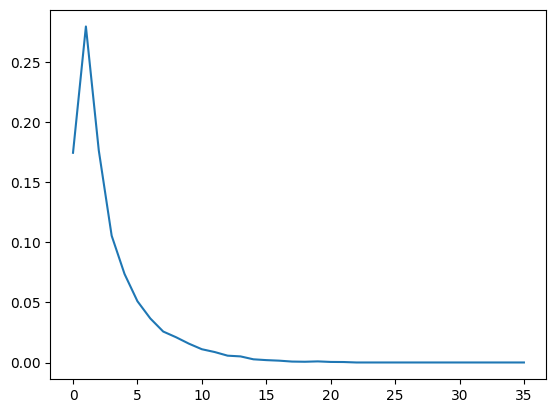

In [ ]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()


In [ ]:
predictions


,actual,prediction,diff
DATE,,,
1979-01-14,76.0,67.212624,8.787376
1979-01-15,77.0,73.577208,3.422792
1979-01-16,77.0,75.427525,1.572475
1979-01-17,74.0,76.503051,2.503051
1979-01-18,73.0,73.802763,0.802763
...,...,...,...
2022-02-24,117.0,118.389132,1.389132
2022-02-25,117.0,117.106435,0.106435
2022-02-26,117.0,117.754396,0.754396


In [ ]:
#special note
#we could use xgboost or random forest or more complicated model may
# may perform better or not it depend